# A quick Python refresher

We expect that most of those taking IN1910 to have some Python experience. However, you might not have used the language that recently. This notebook is meant as a quick refresher on some Python syntax. We will show some simple examples to get the ball rolling, and you can use the first set of exercises to try your hand at writing some code yourself.

If you don't know any Python going into IN1910, you should be able to pick it up along the way. However, you should expect to devote more time to working with the material, especially in the first weeks of the course. In this case, please ensure you do all the weekly exercises, and please ask the lecturer of your TA (gruppelærer) for helpful advice on how to better learn Python.

If this refresher is not sufficient for your needs, we can recommend *Introduction to Scientific Programming with Python* by Joakim Sundnes. You can find it as an open access eBook here:
* https://www.springer.com/gp/book/9783030503550

Another, more extensive, resource you can use is *A Primer on Scientific Programming with Python* by Langtangen.


## This book is interactive!

This document and the rest of course material is written using [jupyterbook](https://jupyterbook.org). All of the content is written in a format called [Myst Markdown](https://myst-parser.readthedocs.io/en/latest/) that can be translated to jupyter notebooks. If you take a look at the top of the page you will see an icon of a space rocket, and hovering over this will show three options; *Binder*, *JupyterHub* and *Live Code*.

```{figure} ../../figures/jupyterbook.png
---
width: 150px
name: jupyterbook
alt: jupyterbook
---
```

Clicking on *Binder* or *JupyterHub* will open this page in a jupyter notebook. We recommend you use *JupyterHub* because this will run you code on dedicated servers at UiO which will be more performant. If you click on *Live code*, then that will first spin up a server (which will take a minute), and the the code cells on this page will become interactive and allow you to change an run the cells without leaving the page.



### A note about jupyter notebooks
A jupyter notebook is a tool that allows for combining traditional text with code that is executable. Previously known as IPython notebooks, the name was changed to reflect that it works with many different languages. The name Jupyter comes from "Julia, Python and R", which are three programming languages that work with the software. Jupyter has grown into a popular tool for scientific programming, both for teaching and development.

You are not required to become proficient at using or writing notebooks in this course, and you are free to simply read the documents and do all your own coding in your preferred text editor. However, Jupyter is a nice tool to know, so feel free to also make your own notebooks, or to solve the weekly exercises in Jupyter. Note also that if you open the lecture notes in notebooks you will be able to play around with code and concepts as you are reading the notes, which can be a big help.

In notebooks, everything consists of cells, which are either markdown (text, math, html, etc) or code. In the markdown cells you can render mathematics with LaTeX syntax, and you can include markdown tables, lists, and use html to include images. In the code cells you can write code, and then execute the cell to see the output. You can do this either by clicking the `Run` command in the toolbar on the top, or use the more efficient shortcut `Ctrl+Enter` or `Shift+Enter`. When you run a code, the output will appear below the cell. If you make a change to a cell that has already been run you can rerun the cell, and the new output will replace the old one.

One element that might be confusing to those that have not used notebooks before, is that the notebook is one interactive session, and so variables are remembered after running a cell. However, when loading up a notebook for the first time, everything is forgotten, and you will need to run the cells in order again for everything to work properly. Here a helpful tip is to use the `Kernel` > `Restart and Run All` functionality in the toolbar, which will run the whole notebook in order and load everything into memory.

## Variables and Types in Python

In Python, as in most languages, we use `=` for assigning variables. We do not need to declare the type of the variables, this is implicit and decided by context

In [1]:
t = 0.5
v0 = 2
a = 0.2
s = v0 * t + 0.5 * a * t**2

Here we first assign the three variables `t`, `v0` and `a`. Then we assign the variable `s` based on our other variables by doing some arithmetic. An assignment on the form of the final line is interpreted as follows:
* Evaluate the right-hand side of the `=` symbol, this results in an *object*
* The left hand side is a name for that object
In this case, the result of the computation is a number, and `s` becomes a name for that number. But how do we check what `s` is? We use the `print`-statement.


## Printing

In [2]:
print(s)

1.025


Note that `s` is a name pointing at a number object containing 1.025. If we now for example reassign `t`, `s` will _not_ change.


Typically we want to print out a longer message, rather than just the variable. In this case we can use print-formatting to have more control. There are several ways to do this in Python, but the most straight-forward method (also the most recently introduced) are called f-strings.

To use f-strings, you must place a `f` or `F` character immediately before your string. You can then use curly braces `{}` to place variables into the string as follows

In [3]:
print(f"After {t} seconds, the object has traveled {s} meters")

After 0.5 seconds, the object has traveled 1.025 meters


In addition to specifying which variables are to be printed where, you can add in further information about how the variables are to be printed. You can for example specify the number of decimals to print as follows

In [4]:
print(f"After {t:.2f} seconds, the object has traveled {s:.2f} meters")

After 0.50 seconds, the object has traveled 1.02 meters


Here `:.2f` is used to specify two decimals, the letter f in this context is short for `float`. Another neat trick, that is useful for debugging is to print the variable names, e.g

In [5]:
print(f"t={t}")

t=0.5


However, with f-string there is a shorthand for this, namely

In [6]:
print(f"{t=}")

t=0.5


If you want a more comprehensive introduction for formatting output, you can take a look at this link from the official Python docs:
* https://docs.python.org/3/tutorial/inputoutput.html

## Rounding
Note from the previous example that the result is a bit surprising, as 1.025 got rounded to 1.02, instead of 1.03 as you might have expected it to. This is because we are using Python3, which uses something called [*bankers' rounding*](https://en.wikipedia.org/wiki/Rounding), in which a .5 is rounded down if the preceding number is even, and up if it is odd. The same behavior is shown in the built in `round` function

In [7]:
print(round(0.5))
print(round(1.5))
print(round(2.5))
print(round(3.5))

0
2
2
4


## Importing

Python includes a large number of standard libraries and external packages. In IN1910 we will for example make use of the SciPy stack, which includes packages like numpy, scipy, matplotlib, etc. We can import packages in several ways

In [8]:
from math import *
import scipy
import numpy as np
from scipy.integrate import solve_ivp

These are different examples of importing. They are all functional Python code, but they will behave slightly differently. Let us explain them all.

**(Example line 1)** The first line uses what we call a *wildcard* to import everything in the `math` library. Note that while this is OK for a quick example, it is considered bad practice and should be avoided. This is because it is unclear what functions from `math` you actually intend to use, and it can overwrite variables. See for example the following example library

In [9]:
from numpy import *
from math import *

x = linspace(0, 2 * pi, 1001)
y = sin(x)

TypeError: only size-1 arrays can be converted to Python scalars

This code will not work, as the `sin` function will here refer to `math.sin`, which is not vectorized and so cannot work on `x`, which is an array. If you change the order of the two imports however, the code will work, because then `sin` refers to `numpy.sin`, which *is* vectorized.

(**Example line 2 & 3**) It would be much better to import the two packages in their own namespace with

In [10]:
import math
import numpy as np

Now we can use either `sin` function by referring to them as `math.sin` and `np.sin` in the code, and there is no confusion. We will need to write a bit more code, but it will also be very apparent where the functions we are using are imported from.

Note that the keyword `as` is used rename the namespace from `numpy` to `np`. This is very common and is used to save us typing later on, as we typically use a lot of `numpy` functions in our scientific code. Note that the name `np` is a convention, and you should try to stick to exactly that and not make up your own naming. Similarly we will use the package `matplotlib.pyplot` for plotting in this course, which is typically imported under the name `plt`.

(**Example line 4**) The fourth import line imports a single function from a package. The nice thing about this import is that it makes it very apparent to whoever reads the code exactly what functions or features from a package you use later in the code. This can therefore be preferred over importing a whole namespace if you know you only use a few functions.

Regardless of which style of import you use, import statements should always appear at the top of modules. Modules are what we call separate Python-files. Placing imports at the top is an example of *code style*, which we will cover later in the course.

### A note about performance
All of the following statements are equivalent in terms of performance
```python
from numpy import *
import numpy
import numpy as np
from numpy import sin
```
It might be reasonable to think that when you do `from numpy import sin` you are only importing a single function from `numpy` and thus it should take less time. However, this is not the case. The difference is what will be available for you. In all cases you will load the entire `numpy` library.


### Exercise 1: Your turn

The radius of a standard size football is 11 cm. Write code that defines this radius as the variable `R`, the computes the volume of the football according to the following formula

$$V = \frac{4\pi R^3}{3}.$$

Then finally print out the volume with a single decimal.

* Hint: You need to either define `pi` or import it from `math`.
* Hint: To get a neater output, you can convert the `V` variable to be in terms of liters.

In [11]:
# Fill in your code here

## Running scripts from the command line

Python scripts are typically saved with the extension `.py`. When you create a Python file, i.e., `find_volume.py`, you can run it from a terminal with the command
```
python3 find_volume.py
```
Depending on your installation, the command `python` might refer to Python 2 instead of 3. To check the version of python you can execute the command
```
python --version
```
If it says Python 2.X (most likely 2.7), you should make sure to use `python3`, i.e
```
python3 --version
```

A lot of code editors and IDEs (integrated developer environments) also let you run Python scripts directly from the editor. If you prefer to do it this way, you should also ensure you are running Python 3 instead of 2.

Note also that we will assume that you are using python version 3.8 or newer in this course, so some of the code might not be working even if you are using python 3. One example is the f-string trick that we showed earlier (i.e `print(f"{t=}")`). This syntax was introduced in python version 3.8
However, most of the code will be compatible with all versions of python.

As you work on bigger projects, many of the Python scripts you create are not necessarily meant to be run directly, but rather imported by other scripts. A useful code structure to include then is the following statement

In [12]:
if __name__ == "__main__":
    ...
    # Code that is to be executed goes here

Any code that is put into an if-statement like this is executed if, and only if, you run the script directly, but not if the script is imported by another. This statement is not strictly necessary, but it is very useful when working on bigger projects and is therefore considered good practice. We will explain the statement and why it works the way it does later in the course.


## Variable Types

In our assignment earlier, we defined four variables, all numbers. However, their data types are slightly different. The variables `t`, `a` and `s` were assigned decimal numbers, and therefore became `float` objects, while `v0` is set to an integer number, and became an `integer` object. You can check the type of a variables with the `type` command

In [13]:
print(type(t))
print(type(v0))
print(type(a))
print(type(s))

<class 'float'>
<class 'int'>
<class 'float'>
<class 'float'>


There are plenty of built-in types in Python 3. Some of the common ones are
* Boolean `bool`
* Integer `int`
* Floating point `float`
* Complex floating point `complex`
* String `str`
* List `list`
* Tuple `tuple`
* Range-object `range`
* Dictionary `dict`
* Set `set`
* Immutable set `frozenset`

There are plenty of others, especially if we include the standard libraries, but not all are equally important. One of the more important ones for scientific programming is the numpy array, which is especially useful for vectorized computations and linear algebra. We will learn more about why numpy arrays are so efficient later in the course, when we turn to C++.


## Mutable vs Immutable

Note that in Python some variables are *mutable*, while some are *immutable*. This somewhat strange word simply means "changeable". The differences between these variable types can trip up many Python novices, and it is worth taking a closer look at how they behave.

Here are some of the standard variable types divided into mutable and immutable
* Immutable: `bool`, `int`, `float`, `str`, `tuple`
* Mutable: `list`, `dict`, `set`

The first set of variables are *immutable* and therefore cannot change. The second type can. Let us explain what we mean by this with some examples.

In [14]:
# Integers are immutable
a = 5
b = a
a += 5

print(f"{a = }")
print(f"{b = }")

a = 10
b = 5


In [15]:
x = [0]
y = x
x.append(1)
print(f"{x = }")
print(f"{y = }")

x = [0, 1]
y = [0, 1]


These two example show fundamentally different behavior. In both cases we first define one variable, then we make a "copy" of the first variable, by assigning `b = a` and `y = x`. We then change the original and print out both variables.

You might expect that the copied variables (`b` and `y`) should be unchanged, since we only change the originals (`a` and `x`). In the first example, we see that this is indeed the case, as `b` is still 5. In the second case however, the list `y` is changed! What is going on?

To understand this, we need to recall how Python objects work. When we are assigning `b = a` or `y = x`, we are not actually making any new *objects*. We are making new *names*, and these names will point as the same objects as the original names are pointing to. When we say `a +=` or `x.append` we are effectively telling Python to change these underlying objects.

For the integer case, the underlying object cannot be changed, and so what happens is that instead Python creates a brand new integer object which `a` can now refer to. So `a` is now referring to a new integer object with a value of 10, while `b` is referring to the unchanged original integer object 5.

For the list case, the underlying object *can* change, as lists are mutable. When we tell Python to change `x`, the underlying list object is changed. Because `x` and `y` refer to the same object, changing `x` therefore also changes `y`.

If you actually do want to keep `y` unchanged you need to make a copy of the list explicitly, i.e

In [16]:
x = [0]
y = x.copy()  # Make a copy
x.append(1)
print(f"{x = }")
print(f"{y = }")

x = [0, 1]
y = [0]


Now python will take the list that is assigned to `x` and copy it to a brand new location in memory.

This example might feel like we are making a lot of fuss about minor details. But the differences between mutable and immutable objects and how they are treated is quite important for properly understanding Python. As we will work a lot with object-oriented programming in IN1910, it is worth spending time to properly grasp these basics.



## PythonTutor

When learning programming, it is easy to get confused by examples such as the one we just saw. In such cases, it can be good to visualizing what is going by drawing a small sketch of what is going on behind the scenes in the program. A helpful tool here is the online Python tutor:
[http://pythontutor.com](http://pythontutor.com/visualize.html#mode=edit)

This tools lets you write Python code and execute it line by line. For each statement executed, it shows what objects and variables exist, and in which scopes. This can be super helpful for understanding confusing examples such as mutable variables. You can run the two cases shown above in Python tutor and observe the differences.

If you are using Visual Studio Code editor, there is also an extension called [Python Preview](https://marketplace.visualstudio.com/items?itemName=dongli.python-preview) that will show you how the code is executed as you type it in your editor.


## Functions in Python

In Python, functions are variables/objects that are *callable*, meaning we can execute them to perform some computation or action. Functions can be built in (such as `print`), imported (such as `math.sqrt`) or you can define your own functions.

To call on a function we place round parentheses (`()`) behind the variable name. Inside the parentheses we can place function arguments. A function can take zero, one or many arguments. Some functions can also take a variable number of arguments. Take for example the built-in `round` function. This takes in a number which it rounds for us, e.g.,

In [17]:
round(22 / 7)

3

However, we can use a second argument to specify the number of decimals we want to round to

In [18]:
round(22 / 7, 3)

3.143

In Python we also often use something called *keyword arguments*. These are optional arguments that are named by a keyword. Take for example the `print` function, which takes whatever you want to print out as its input argument. It also has keyword arguments like `sep` and `end` which can be used to influence what characters it places between different inputs or at the end of lines. Normally different `print` calls will give new lines, as follows

In [19]:
for n in range(10):
    print(2**n)

1
2
4
8
16
32
64
128
256
512


If we send in the keyword argument `end=" "` no such newline is added, instead we add a simple space after each print

In [20]:
for n in range(10):
    print(2**n, end=" ")

1 2 4 8 16 32 64 128 256 512 

### Defining your own functions

You can define your own functions in Python using the `def` keyword. You should use the `return` keyword to specify the return-value (the output) of the function, and if you don't specify the return value, then the function will return a special object called None.

In [21]:
def function_no_return_value():
    ...

x = function_no_return_value()
print(x)

None


Noticed also that here we have used ellipsis (i.e `...`) as a placeholder for the body of the function. This is perfectly valid code, but it doesn't do anything.


You can choose freely how many arguments and keyword-arguments a function should have, and you can name these yourself. For any keyword argument you must specify their default value.

In [22]:
def double(x, n=1):
    for _ in range(n):
        x *= 2
    return x

In this example we define a function that doubles its input argument. Note that we define the function with a keyword argument (`n=1`). Thus the user can either omit the second argument `n` entirely, in which case it defaults to 1, or they can specify it, to double several times in a row

In [23]:
y = 5
print(f"{y} doubled is {double(y)}")
print(f"{y} doubled three times is {double(y, n=3)}")

5 doubled is 10
5 doubled three times is 40


Note that calling the function returns the doubled value, it does not change the variable used as the argument (`y`). Thus printing `y` would reveal it to still be 5. In fact, changing `y` in this manner would be impossible, as integers are immutable, and so the object that `y` points to cannot be changed. A function *can* however change its input if it is a mutable object, such as a list.


Let us show one more example of defining a function

In [24]:
import numpy as np


def roll_dice(n=1):
    return sum(np.random.randint(1, 7, n))

This function uses `np.random.randint` to throw one or more dice (the name `randint` is short for *random integer*. This function takes no normal arguments, only a keyword argument. We can thus call the function with no input, in which case a single die is thrown, or we can specify that we want to throw several dice and return the sum

In [25]:
print(f"Single die: {roll_dice()}")
print(f"Sum of three dice: {roll_dice(n=3)}")

Single die: 5
Sum of three dice: 11


This function is an example of a *stochastic trial*, which means the result is random. We will talk more about stochastic code later in the course, and also cover how the computer generates random numbers such as these.

### Exercise 2: Your turn

Normal dice have six sides, but many other types of dice existing. In board games for example, dice with 4, 8, 12, and 20 sides are for example very common. Therefore, extend the `roll_dice` function to also use a keyword argument `d` which represents the number of faces on the dice being thrown. The keyword should default to the standard 6 sides.

In [26]:
# Fill in your code here

### Another example of mutable and immutable data structures

A general rule of thumb is that immutable data structures are preferred if you can use both. When working with mutable data structures such as lists you need to be careful. Consider the following example

In [27]:
def append_one(x):
    x += [1]
    return x

a = [0]
b = append_one(a)
print(f"{a = }")
print(f"{b = }")

a = [0, 1]
b = [0, 1]


At the first glance you might expect the output to be
```
[0]
[0, 1]
```
However, since you passed in a list you also changed the argument that is passed in. If you don't want to change that input argument, then you would be much better of using a `tuple`, i.e

In [28]:
def append_one(x):
    x += (1,)
    return x


a = (0,)
b = append_one(a)
print(f"{a = }")
print(f"{b = }")

a = (0,)
b = (0, 1)


## For Loops

We have already shown a few examples of for loops in Python, which have the following syntax
```Python
for <element> in <iterable>:
    <code block to be repeated for each element>
    <code block to be repeated for each element>
    <code block to be repeated for each element>
```

Here, we can name the element whatever we want, for simply integer counts it is normal to use `i`, `j`, and `k`.

We can loop over any iterable object in Python, for example sequences such as lists and tuples. If you want to loop over a range of numbers, you can use the built-in range function:
```python
for i in range(10):
    ...
```
Note that the `range`-object is not a list but it is iterable. We will see more examples of such structures later in the course (such as generators) which provides much better memory performance than lists. If you want a list of integers, simply cast the `range`-object to a list: `list(range(10))`

Two helpful commands to be used in loops are `continue`, which skips to the next iteration of the loop, and `break`, which breaks the remaining iterations, for example

In [29]:
for i in range(10):
    if i % 2 == 0:
        # i is divisible by 2
        continue
    print(i)
    if i > 6:
        break

1
3
5
7


**Example: Using a for-loop to check whether a number is prime**

In the following example we define a function that checks whether a given integer is a prime or not. To do this we use *trial division*, which looks for a divisor to the number $n$ in the interval $[2, n)$.

In [30]:
def is_prime(n):
    if n == 1:
        return False

    for d in range(2, n):
        if n % d == 0:
            return False

    return True

This function works because as soon as a number is returned, the function ends. So we first check for 1 as a separate test, because this is a special case. Then we do trial division for the remaining possible candidates. To check whether a given trial divisor $d$ divides $n$ we check whether $n \ \text{mod}\ d = 0$, where `%` is the modulus operator in Python.

Note also that as soon as the function hits a divisor, we know the number is not prime and we can immediately return the boolean `False`. As soon as the function returns, the rest of the execution halts. This is good for efficiency, as the program automatically stops looking for further divisors once one is found.

In [31]:
for i in range(1, 12):
    if is_prime(i):
        print(f"{i:2} is prime")
    else:
        print(f"{i:2} is not prime")

 1 is not prime
 2 is prime
 3 is prime
 4 is not prime
 5 is prime
 6 is not prime
 7 is prime
 8 is not prime
 9 is not prime
10 is not prime
11 is prime


## List Comprehensions

We can also use *list* comprehensions to quickly compile lists on single-lines using a for-loop syntax. Take the following example where we assemble a list of primes.

In [32]:
primes = []
for i in range(1, 13):
    if is_prime(i):
        primes.append(i)
print(primes)

[2, 3, 5, 7, 11]


This is the straight forward way to assemble a list. First create an empty list variable, then build it element by element by appending.

However, in Python, we can also do this in a single line using list comprehension as follows

In [33]:
primes = [i for i in range(1, 13) if is_prime(i)]
print(primes)

[2, 3, 5, 7, 11]


Now, to be clear. Doing something in the least amount of code lines is rarely a goal in and of itself. And more compact code can often be considered less readable and should in certain cases often be avoided.

However, list comprehensions are considered very "pythonic" and are actually faster than using a loops and appending. As such they are very useful, and you shouldn't hesitate to use list comprehensions were applicable (and similarly dictionary comprehensions).

One think to note is that in list comprehension we use square brackets `[]`. However it is also possible to obtain a similar behavior using parenthesis `()`, but the results is not a list but something called a generator expression. We will talk more about this [later in the course](software-optimization:memory-optimization)

### Exercise 3: Your turn

Use a list comprehension to assemble a list of all non-primes $\leq 12$. To do this either use the `is_prime` function, or use the list `primes`.

In [34]:
# Fill in your code here

## Enumerate and zip

Two built-in functions that are very useful when looping over sequences are `enumerate` and `zip`. Let us show an example of these in practice.

The function `enumerate` is useful when you want to loop over a list and also have access to the index of an element. Say for example we want to print out primes by their index, we can do that as follows

In [35]:
for i, prime in enumerate(primes):
    print(f"Prime nr {i+1}: {prime}")

Prime nr 1: 2
Prime nr 2: 3
Prime nr 3: 5
Prime nr 4: 7
Prime nr 5: 11


Here we loop over the `primes` list from earlier, but because we use `enumerate` we can loop over the index as well, which is why we write `for i, prime in ...`. Here `i` will start at 0 and count up for each element, while `prime` will be equal to the values in the list.


The function `zip` is useful if you want to loop over two or more sequences simultaneously. Say for example we are making a game and have a list of players and a list of the points scored for each player, then we could write out the results as follows

In [36]:
players = ["Alice", "Bob", "Charlie", "Danny"]
points_per_player = [212, 189, 244, 231]

for player, points in zip(players, points_per_player):
    print(f"{player} got {points} points")

Alice got 212 points
Bob got 189 points
Charlie got 244 points
Danny got 231 points


Likewise you could `zip` three or more sequences together.


## While Loops

We have covered for loops, which iterate over some sequence. The other kind of loop is a while loop, which repeats a block of code as long as some condition is true. The syntax is as follows:

In [37]:
while condition:
    ...
    # <code block to be repeated>

NameError: name 'condition' is not defined

The condition has to be some statement that can be evaluated to either True or False.


Assume we have a savings account with an annual interest of 3.5%. If we deposit 10000 kr to the account at the start of year 0. How many years would you need to wait before the money in the account has doubled?

In [38]:
years = 0
interest = 1.035
money = 10000

while money < 20000:
    money *= interest
    years += 1

print(
    f"You will need to wait {years} years, you'll have {money:.0f} kr in your account"
)

You will need to wait 21 years, you'll have 20594 kr in your account


It is not uncommon to accidentally define while loops that never end. If you for example forget to update the `money` variable in the last example. In such cases you need to interrupt the execution of the program yourself. If you have run from the terminal you can enter `Ctrl + C`, while in Jupyter you should click `Kernel > Interrupt`. If you are running through your editor there should also be a command for terminating execution, but this will depend on what editor you use and how it is set up.


### Exercise 4: Your Turn**

Use a while loop to find the biggest integer $n$, such that $n^3 < 50000$.

In [39]:
# Fill in your code here

## Plotting

Plotting is a useful tool in Python. Many packages exist for plotting, but the most popular one, and the one we will use in IN1910, is *matplotlib* (Mathematical Plotting Library), which is also part of the scipy stack. Matplotlib is easy to learn, but can become a bit messy to use if you want to control every fine detail of the figure. If you know matplotlib properly, you can make gorgeous figures for projects, publications and reports. For this it is helpful to see the [matplotlib website](https://matplotlib.org/gallery/index.html) which is full of examples and tutorials.

We will cover some more advanced use cases of matplotlib later in the course, but for now we simply cover some simple curve plots of functions. Note that it is common to import `matplotlib.pyplot` as `plt`.

In [40]:
import matplotlib.pyplot as plt

The `plt.plot` command takes a list of values on the $x$-axis and a list of values on the $y$-axis, and draws a line through them. As an example we use `np.linspace` and `np.sin` to define a sine-curve:

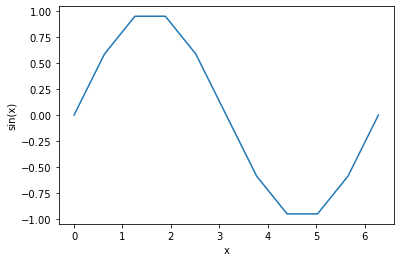

In [41]:
x = np.linspace(0, 2 * pi, 11)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

The curve is choppy because we have such few points, which is more obvious if we redefine the linestyle:

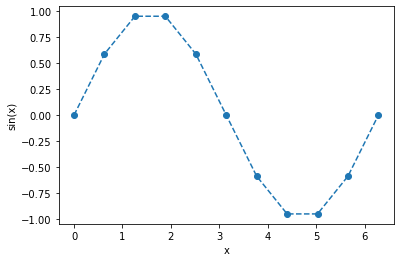

In [42]:
plt.plot(x, y, "o--")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

To get a smoother curve, we need to add more points, this is as easy as adding more points to the `linspace` argument. Let us also illustrate how we add another curve to the same figure

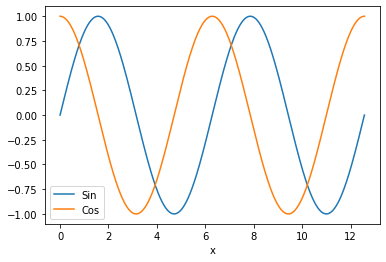

In [43]:
x = np.linspace(0, 4 * pi, 1001)

plt.plot(x, np.sin(x), label="Sin")
plt.plot(x, np.cos(x), label="Cos")
plt.xlabel("x")
plt.legend()
plt.show()

Plotting mathematical functions is very fast with numpy and matplotlib because numpy arrays are vectorized, meaning we can define a series of $x$ values, and compute all $y$ values in a single function call. This is nice, as it makes it quick to explore functions and their behavior.


### Exercise 5: Your turn

Using `numpy` and `matplotlib.pyplot`, plot the dampened sine wave

$$
g(y) = e^{-y}\sin(8y),
$$

for $y \in [0,4]$.

Also add in the enveloping curves $e^{-y}$ and $-e^{-y}$ as dashed gray lines (Hint: You can add `'--'` and `color='gray'` as arguments to `plt.plot`).

In [44]:
# Fill in your code here

## Solving ODE's with Finite Differences

The final topic we cover in this lecture is how to solve integrals and differential equations numerically. This is a major topic in scientific computing, and it can get a bit advanced. If you have taken IN1900 this should be familiar to you. If you have not and this is a new topic for you, don't panic, we won't focus to much on differential equations in this course. Here we only use this as a more advanced problem case to showcase some Python code.

As our example we choose one of the most fundamental and important differential equations, the exponential decay problem

$$
\frac{{\rm d}u}{{\rm d}t} = -au(t).
$$

To solve this differential equation with programming, we can use a finite difference approximation. The simplest of these is called the Forward Euler scheme, which lets use approximate the equation as

$$
\frac{u_{i+1} - u_{i}}{\Delta t} = -au_i.
$$

Here $u_i$ represents the solution at a give point in time, so that $u_i \equiv u(t_i)$, and $t_i = i\cdot \Delta t$. Rearranging the equation lets us compute us forward in time using *time-stepping* and thus compute the solution $u(t)$ one step at the time

$$
u_{i+1} = (1 - a\Delta t)u_{i}.
$$

If the mathematics of what we are doing here is a bit over your head: Don't panic. Put simply we have found an equation we can use to compute a curve or array one value at the time. The goal is now simply to implement this equation as code, and this is mainly a programming challenge, and not a mathematical one.

To solve the equation we first need to define all our parameters and initial conditions. Let us say that $u_0 = 4$ and $a=0.5$. Let us use a time step of $\Delta t = 0.001$ and solve for the time $t\in[0, 10].$


Our first task is to define our parameters and set up the time array $t$ as well as an empty solution array $u$

In [45]:
a = 0.5
u0 = 4
dt = 0.001
T = 10

t = np.arange(0, T + dt, dt)
u = np.zeros(len(t))
u[0] = 4

Here we use `np.arange` to define the array $t \in [0, 10]$ with a step size of $\Delta t$. Then we use `np.zeros` to define an array filled with zeros of the same length as $t$. We do this because numpy arrays cannot change in size, and so we need to define it of the correct length. Note that the final code line is very important, because we need the correct $u_0$ value to compute the next value, i.e., $u_1$, which can be used to compute $u_2$ which gives us $u_3$ and so forth. The time stepping itself is given by a for loop

In [46]:
for i in range(len(u) - 1):
    u[i + 1] = (1 - a * dt) * u[i]

After running this loop, `u` should contain the solution for all given time points, and we can not plot $u(t)$ to see the solution

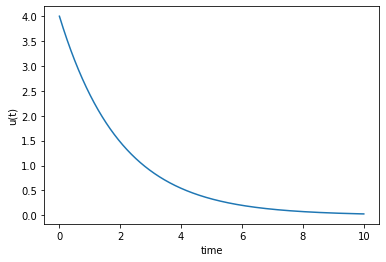

In [47]:
plt.plot(t, u)
plt.xlabel("time")
plt.ylabel("u(t)")
plt.show()